<a href="https://colab.research.google.com/github/joshfpedro/math-328/blob/main/numerical_calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Calculus

## Numerical Differentiation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def approx_derivative(f, x, h=1e-5):

    # Backward Difference
    backward_diff = (f(x) - f(x - h)) / h

    # Forward Difference
    forward_diff = (f(x + h) - f(x)) / h

    # Central Difference
    central_diff = (f(x + h) - f(x - h)) / (2 * h)

    return backward_diff, forward_diff, central_diff

# Example
def example_function(x):
    return np.sin(x)

x_value = 2

backward, forward, central = approx_derivative(example_function, x_value, h=1e-10)

print("Backward Difference:", backward)
print("Forward Difference:", forward)
print("Central Difference:", central)
print("Exact Derivative:", np.cos(x_value))

Backward Difference: -0.4161471167662967
Forward Difference: -0.4161471167662967
Central Difference: -0.4161471167662967
Exact Derivative: -0.4161468365471424


In [2]:
def derivative(f, x, h=1e-5, method='central'):
    """Compute numerical derivative of f at x."""

    if method == 'central':
        return (f(x + h) - f(x - h)) / (2 * h)

    elif method == 'forward':
        return (f(x + h) - f(x)) / h

    elif method == 'backward':
        return (f(x) - f(x - h)) / h

    elif method == 'complex':
        return f(x + 1j * h).imag / h

    else:
        raise ValueError("Method must be 'central', 'forward', 'backward', or 'complex'.")

derivative(example_function, x_value, h=1e-16, method='complex')

np.float64(-0.4161468365471424)

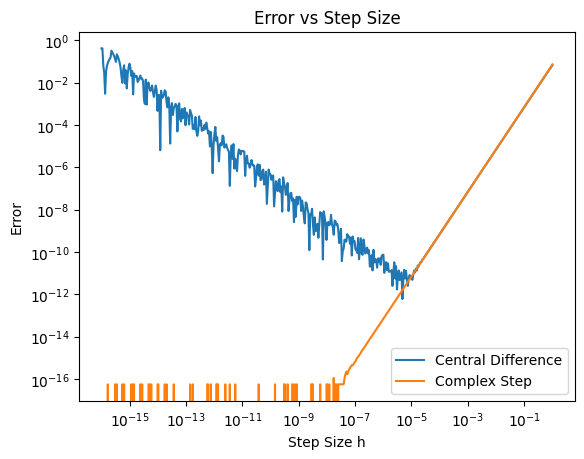

In [3]:
# Define functions
def complex_step(f, x, h): return np.imag(f(x + 1j*h)) / h
def central_diff(f, x, h): return (f(x + h) - f(x - h)) / (2 * h)

# Setup
f = np.sin; x = 2.0; true_val = np.cos(2)
h_vals = np.logspace(-16, 0, 500)
complex_errs = []; central_errs = []

# Compute Errors
for h in h_vals:
    complex_errs.append(abs(complex_step(f, x, h) - true_val))
    central_errs.append(abs(central_diff(f, x, h) - true_val))

# Plotting (Matplotlib)
plt.loglog(h_vals, central_errs, label='Central Difference')
plt.loglog(h_vals, complex_errs, label='Complex Step')
plt.title('Error vs Step Size')
plt.xlabel('Step Size h'); plt.ylabel('Error')
plt.legend()
plt.show()

## Numerical Integration

### Trapezoid Rule

In [4]:
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return (h/2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])

In [21]:
# Example
a = 0
b = np.pi
n = 4
f = lambda x: np.sin(x)

trapezoidal_rule(f, a, b, n)

np.float64(1.8961188979370398)

In [22]:
# Compare with exact definite integral of sin(x) between 0 and pi
-np.cos(np.pi) - (- np.cos(0))

np.float64(2.0)

Approximate Area: 1.9835235375094546
Exact Area: 2.0
Error: 0.01647646249054535


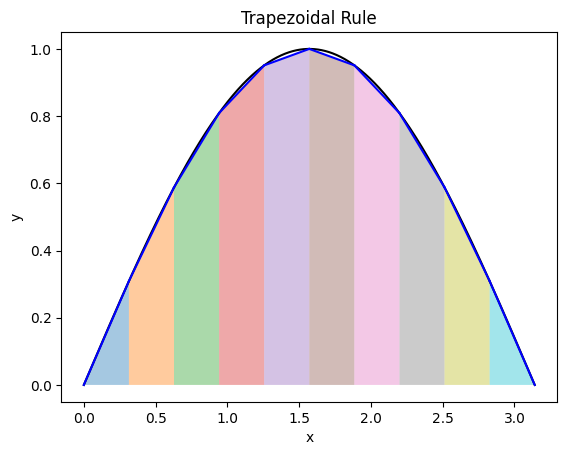

In [52]:
# Example
a = 0
b = np.pi
n = 10
f = lambda x: np.sin(x)

exact_area = -np.cos(np.pi) - (- np.cos(0))

print("Approximate Area:", trapezoidal_rule(f, a, b, n))
print("Exact Area:", exact_area)
print("Error:", abs(trapezoidal_rule(f, a, b, n) - exact_area))

# Setup
x = np.linspace(a, b, n+1)
y = f(x)

x_fine = np.linspace(a, b, 1000)
y_fine = f(x_fine)

# Plot Function
plt.plot(x_fine, y_fine, 'k-', label='Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Trapezoidal Rule')

# Plot Trapezoids
for i in range(n):
    # Fill polygon defined by 4 points: (x_i, 0), (x_i, y_i), (x_i+1, y_i+1), (x_i+1, 0)
    plt.fill_between([x[i], x[i+1]], [y[i], y[i+1]], alpha=0.4)

    # Draw top line
    plt.plot([x[i], x[i+1]], [y[i], y[i+1]], 'b-')

## Simpson's Rule

In [53]:
def simpsons_rule(f, a, b, n):
    if n % 2 != 0: raise ValueError("n must be even")
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)

    # Pattern: 1, 4, 2, 4, ..., 2, 4, 1
    return (h/3) * (y[0] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-2:2]) + y[-1])

simpsons_area = simpsons_rule(f, a, b, n)

error_simpsons = simpsons_area - exact_area
error_simpsons

np.float64(0.00010951731500430384)

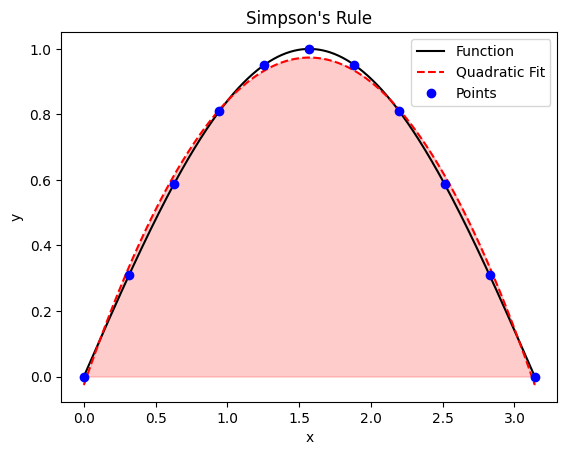

In [56]:
# Setup
x = np.linspace(a, b, n+1)
y = f(x)

# Fit and Plot Parabola for each pair of intervals
# Note: Simpson's uses 3 points (2 intervals) per parabola
poly = np.polyfit(x, y, 2) # Fit quadratic
y_poly = np.polyval(poly, x_fine)

plt.plot(x_fine, y_fine, 'k-', label='Function')
plt.plot(x_fine, y_poly, 'r--', label='Quadratic Fit')
plt.fill_between(x_fine, y_poly, alpha=0.2, color='red')
plt.plot(x, y, 'bo', label='Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Simpson\'s Rule')
plt.legend()
plt.show()

## Monte Carlo Integration

In [167]:
def monte_carlo_integrate(f, a, b, N=1000):
    x_rand = np.random.uniform(a, b, N)
    y_rand = f(x_rand)

    # Integral = (b-a) * Average Height
    return (b - a) * np.mean(y_rand)

monte_carlo_integrate(f, a, b, 1000000)

np.float64(1.9997905112313634)

### Example: Estimating $\pi$ using Monte Carlo integration

In [237]:
def estimate_pi(N=10000):
    # 1. Throw N darts
    x = np.random.uniform(-1, 1, N)
    y = np.random.uniform(-1, 1, N)

    # 2. Check if inside circle
    # Vectorized boolean array
    inside = (x**2 + y**2) <= 1

    # 3. Count hits
    hits = np.sum(inside)

    # 4. Estimate Pi
    pi_est = 4 * (hits / N)
    return pi_est, x, y, inside

pi_val, x, y, inside = estimate_pi(5000)
print(f"Estimated Pi: {pi_val}")

Estimated Pi: 3.1768


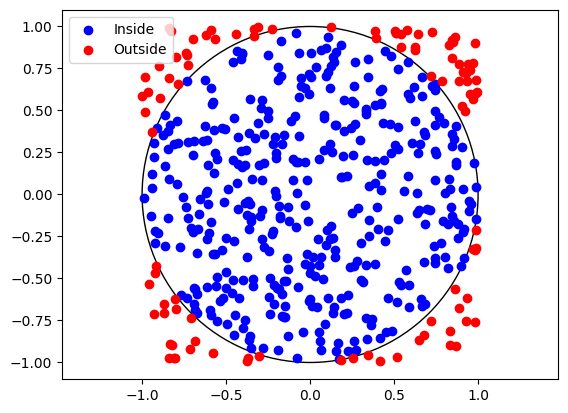

In [242]:
N = 500

# Generate Data
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)
inside = x**2 + y**2 <= 1

# Plot Circle
circle = plt.Circle((0, 0), 1, fill=False)
plt.gca().add_patch(circle)

# Plot Points
plt.scatter(x[inside], y[inside], c='blue', label='Inside')
plt.scatter(x[~inside], y[~inside], c='red', label='Outside')

plt.axis('equal')
plt.legend()

plt.show()